In [ ]:
# Import library
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout

In [ ]:
import kagglehub
adhang_air_quality_in_yogyakarta_indonesia_2021_path = kagglehub.dataset_download('adhang/air-quality-in-yogyakarta-indonesia-2021')

print('Data source import complete.')

Data source import complete.


In [ ]:
import os

# Tampilkan path hasil unduhan
print(adhang_air_quality_in_yogyakarta_indonesia_2021_path)

# Lihat file/folder di dalamnya
print(os.listdir(adhang_air_quality_in_yogyakarta_indonesia_2021_path))

/kaggle/input/air-quality-in-yogyakarta-indonesia-2021
['psi-jogja-sep-2021.csv', 'psi-jogja-oct-2021.csv', 'psi-jogja-nov-2021.csv', 'psi-jogja-jun-2021.csv', 'psi-jogja-aug-2021.csv', 'psi-jogja-may-2021.csv', 'psi-jogja-feb-2021.csv', 'psi-jogja-dec-2021.csv', 'psi-jogja-jan-2021.csv', 'psi-jogja-mar-2021.csv', 'psi-jogja-jul-2021.csv', 'psi-jogja-apr-2021.csv']


In [ ]:
# Membaca dataset januari dari file CSV
df1 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-jan-2021.csv")

# Membaca dataset februari dari file CSV
df2 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-feb-2021.csv")

# Membaca dataset maret dari file CSV
df3 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-mar-2021.csv")

# Membaca dataset april dari file CSV
df4 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-apr-2021.csv")

# Membaca dataset mei dari file CSV
df5 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-may-2021.csv")

# Membaca dataset juni dari file CSV
df6 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-jun-2021.csv")

# Membaca dataset juli dari file CSV
df7 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-jul-2021.csv")

# Membaca dataset agustus dari file CSV
df8 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-aug-2021.csv")

# Membaca dataset september dari file CSV
df9 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-sep-2021.csv")

# Membaca dataset  oktober dari file CSV
df10 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-oct-2021.csv")

# Membaca dataset  november dari file CSV
df11 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-nov-2021.csv")

# Membaca dataset  desember dari file CSV
df12 = pd.read_csv("/root/.cache/kagglehub/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/versions/1/psi-jogja-dec-2021.csv")

# Menyatukan kedua dataset ke dalam satu dataframe
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

# Menampilkan hasil penggabungan
print(df)

           Date      Time  PM10  PM2.5   SO2    CO   O3   NO2  Max  \
0      1/1/2021  00:00:00  13.0   40.0   0.0  25.0  0.0   0.0   40   
1      1/1/2021  01:00:00  12.0   38.0   0.0  24.0  0.0   0.0   38   
2      1/1/2021  02:00:00  11.0   35.0   0.0  23.0  0.0   0.0   35   
3      1/1/2021  03:00:00  10.0   32.0   0.0  22.0  0.0   0.0   32   
4      1/1/2021  04:00:00   9.0   29.0   0.0  21.0  0.0   0.0   29   
..          ...       ...   ...    ...   ...   ...  ...   ...  ...   
739  12/31/2021  19:00:00  15.0    0.0  10.0  21.0  1.0  11.0   21   
740  12/31/2021  20:00:00  16.0    0.0  10.0  21.0  1.0  11.0   21   
741  12/31/2021  21:00:00  17.0    0.0  10.0  21.0  1.0  11.0   21   
742  12/31/2021  22:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   
743  12/31/2021  23:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   

    Critical Component Category  
0                PM2.5     Good  
1                PM2.5     Good  
2                PM2.5     Good  
3                PM2.5 

In [ ]:
df

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,00:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,01:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,02:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,03:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,04:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good
...,...,...,...,...,...,...,...,...,...,...,...
739,12/31/2021,19:00:00,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
740,12/31/2021,20:00:00,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
741,12/31/2021,21:00:00,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
742,12/31/2021,22:00:00,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 743
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                8760 non-null   object 
 1   Time                8760 non-null   object 
 2   PM10                8527 non-null   float64
 3   PM2.5               8527 non-null   float64
 4   SO2                 6243 non-null   float64
 5   CO                  8526 non-null   float64
 6   O3                  5806 non-null   float64
 7   NO2                 8526 non-null   float64
 8   Max                 8760 non-null   int64  
 9   Critical Component  8527 non-null   object 
 10  Category            8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
import pandas as pd

# Gabungkan kolom Date dan Time
df['datetime'] = df['Date'] + ' ' + df['Time']

# Konversi ke datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M:%S')

# Set datetime sebagai index
df = df.set_index('datetime')

# Drop kolom lama jika tidak dibutuhkan
df = df.drop(['Date', 'Time'], axis=1)

# Ekstrak waktu
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.dayofweek  # 0 = Monday, ..., 6 = Sunday
df['hour'] = df.index.hour

# Lihat hasil
df.head()

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,year,month,day,hour
datetime,,,,,,,,,,,,,
2021-01-01 00:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good,2021,1,4,0
2021-01-01 01:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good,2021,1,4,1
2021-01-01 02:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good,2021,1,4,2
2021-01-01 03:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good,2021,1,4,3
2021-01-01 04:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good,2021,1,4,4


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM10                8527 non-null   float64
 1   PM2.5               8527 non-null   float64
 2   SO2                 6243 non-null   float64
 3   CO                  8526 non-null   float64
 4   O3                  5806 non-null   float64
 5   NO2                 8526 non-null   float64
 6   Max                 8760 non-null   int64  
 7   Critical Component  8527 non-null   object 
 8   Category            8760 non-null   object 
 9   year                8760 non-null   int32  
 10  month               8760 non-null   int32  
 11  day                 8760 non-null   int32  
 12  hour                8760 non-null   int32  
dtypes: float64(6), int32(4), int64(1), object(2)
memory usage: 821.2+ KB
None


Text(0, 0.5, 'aqi')

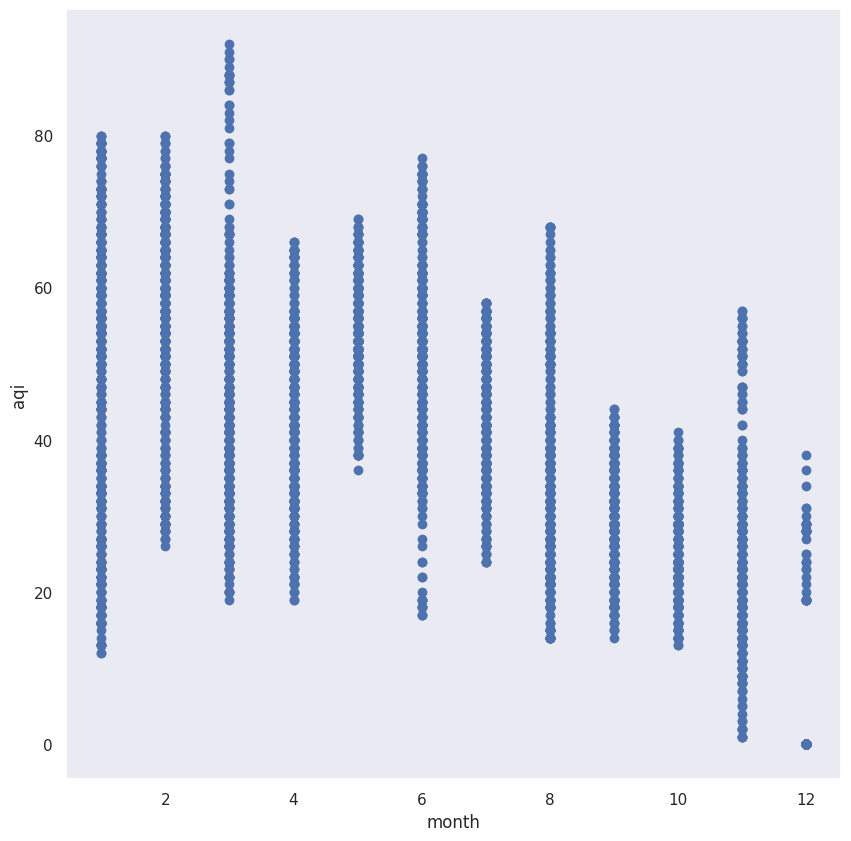

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='month',y='PM2.5',data=df)
plt.xlabel('month')
plt.ylabel('aqi')

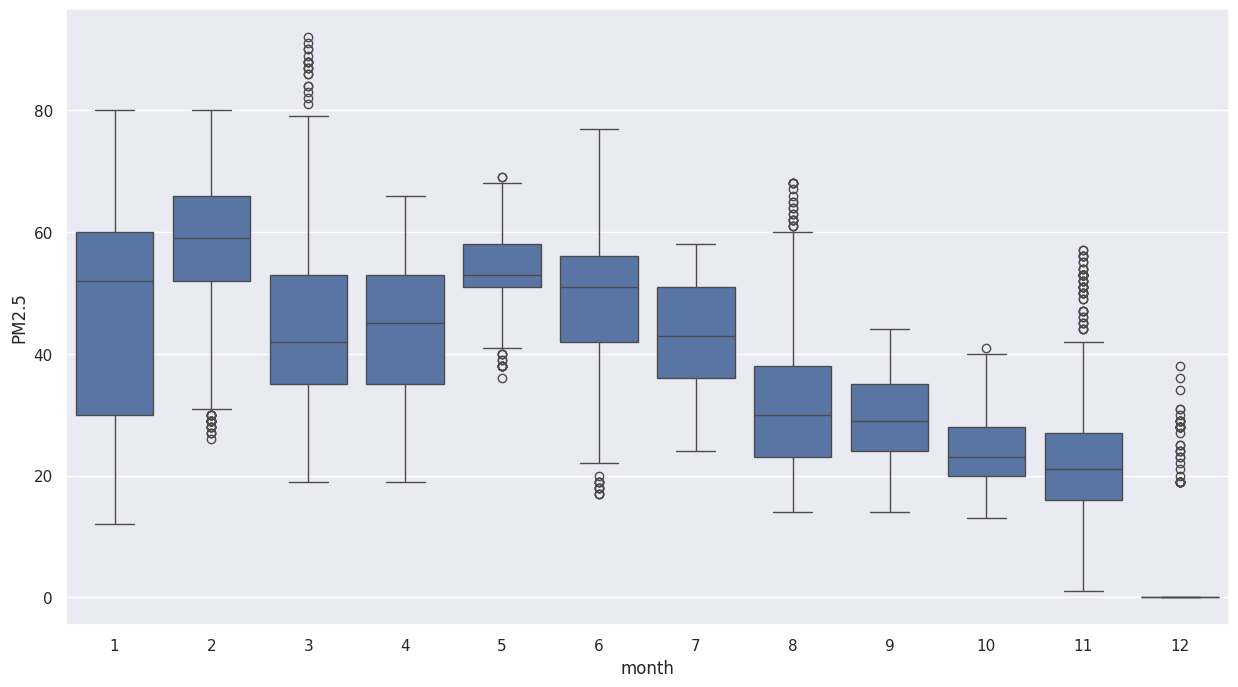

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="month", y="PM2.5", data=df)

Text(0, 0.5, 'PM2.5')

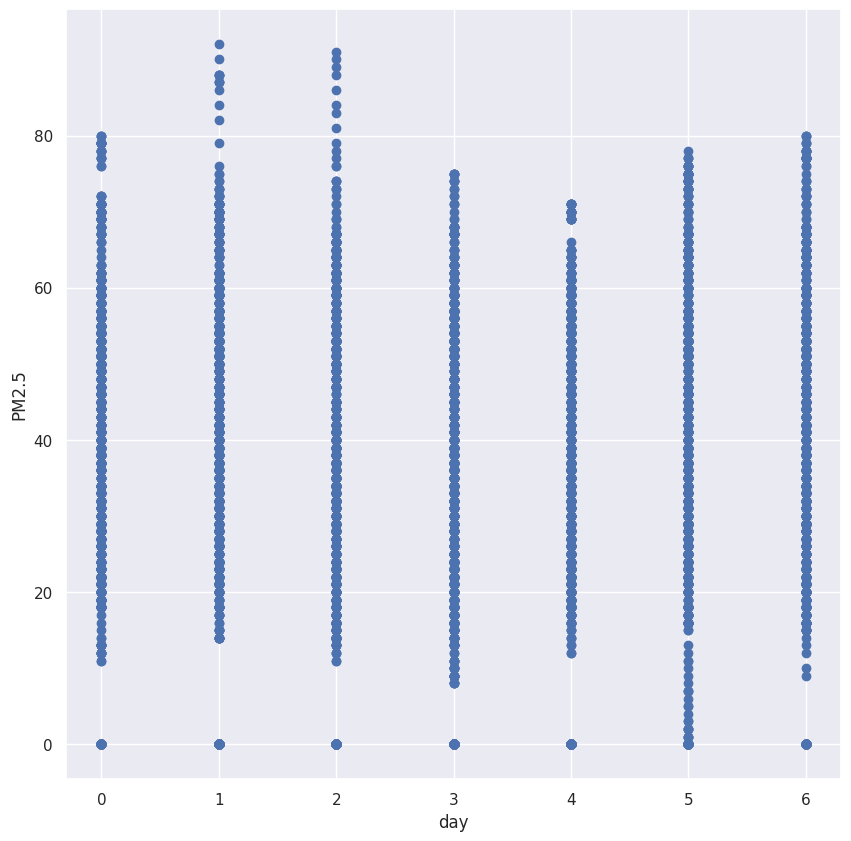

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='day',y='PM2.5',data=df)
plt.xlabel('day')
plt.ylabel('PM2.5')

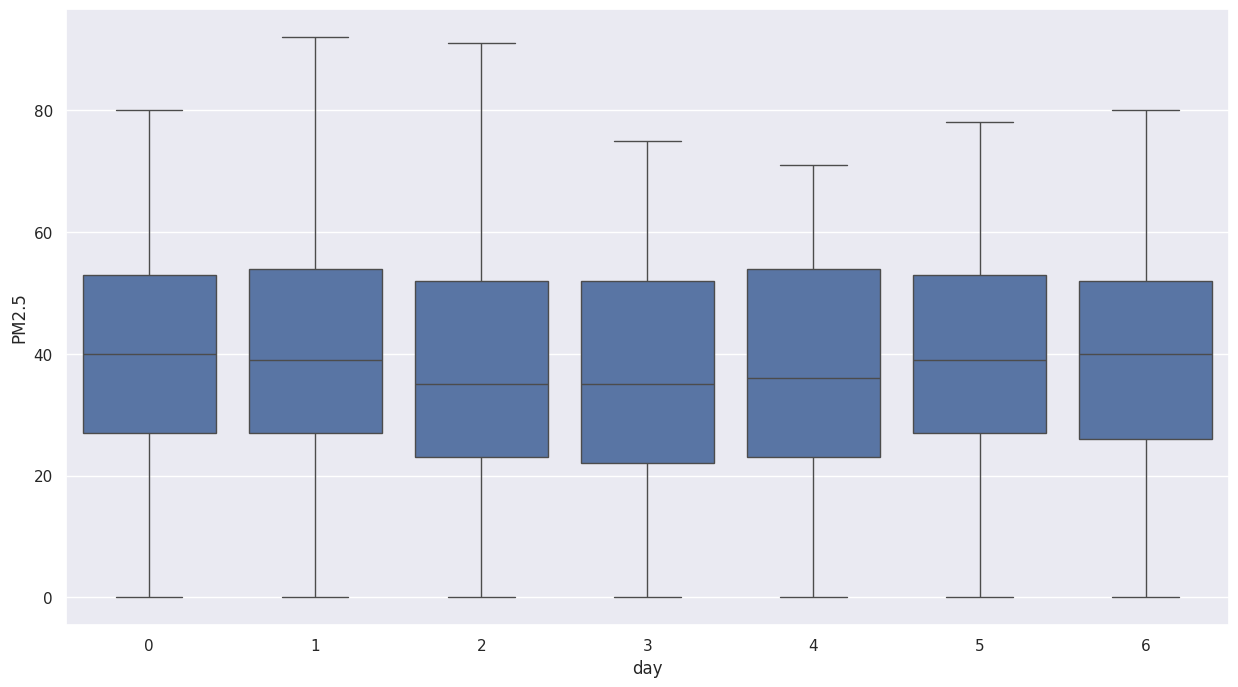

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="day", y="PM2.5", data=df)

Text(0, 0.5, 'PM2.5')

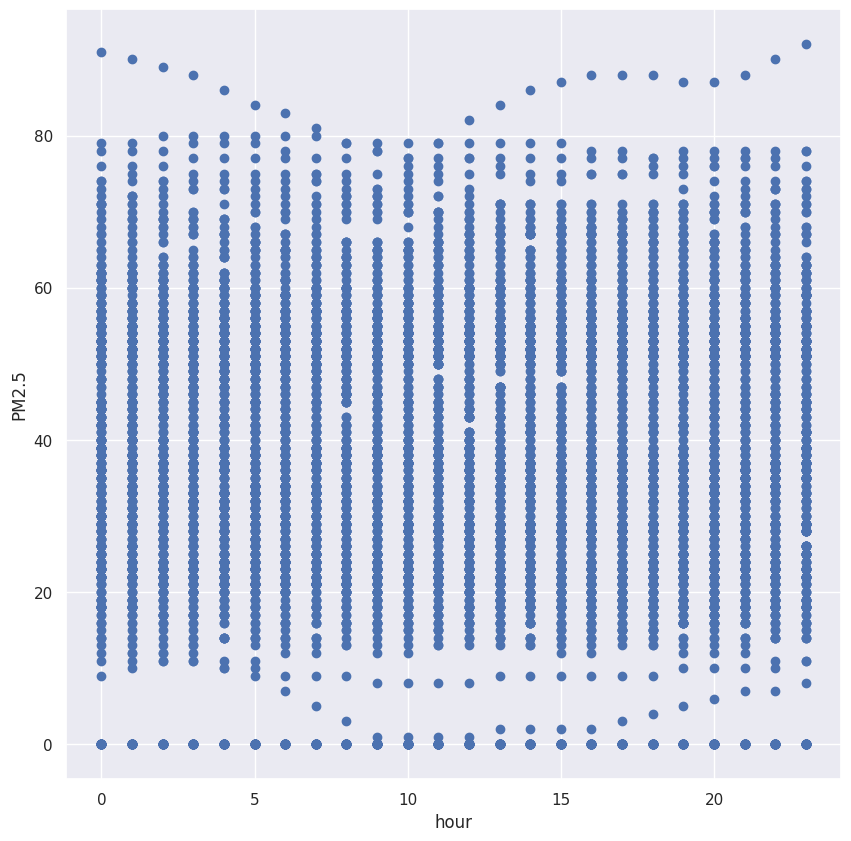

In [ ]:
# UTC Time
plt.figure(figsize=(10,10))
plt.scatter(x='hour',y='PM2.5',data=df)
plt.xlabel('hour')
plt.ylabel('PM2.5')

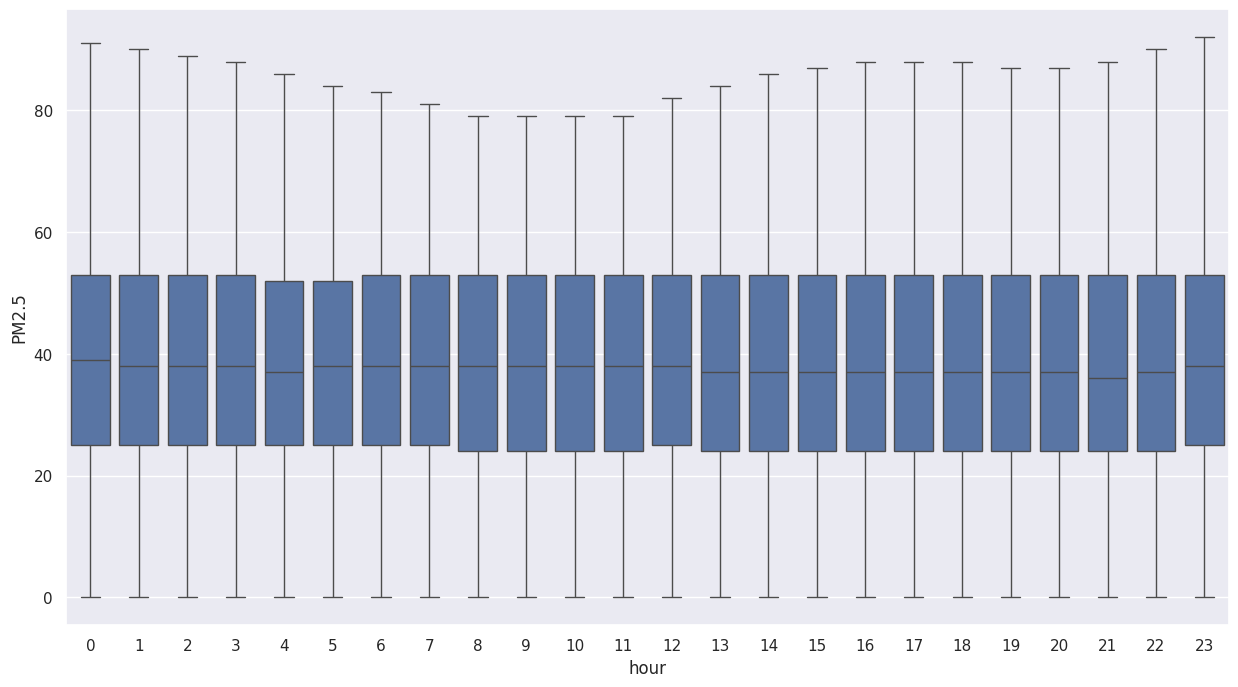

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="hour", y="PM2.5", data=df)

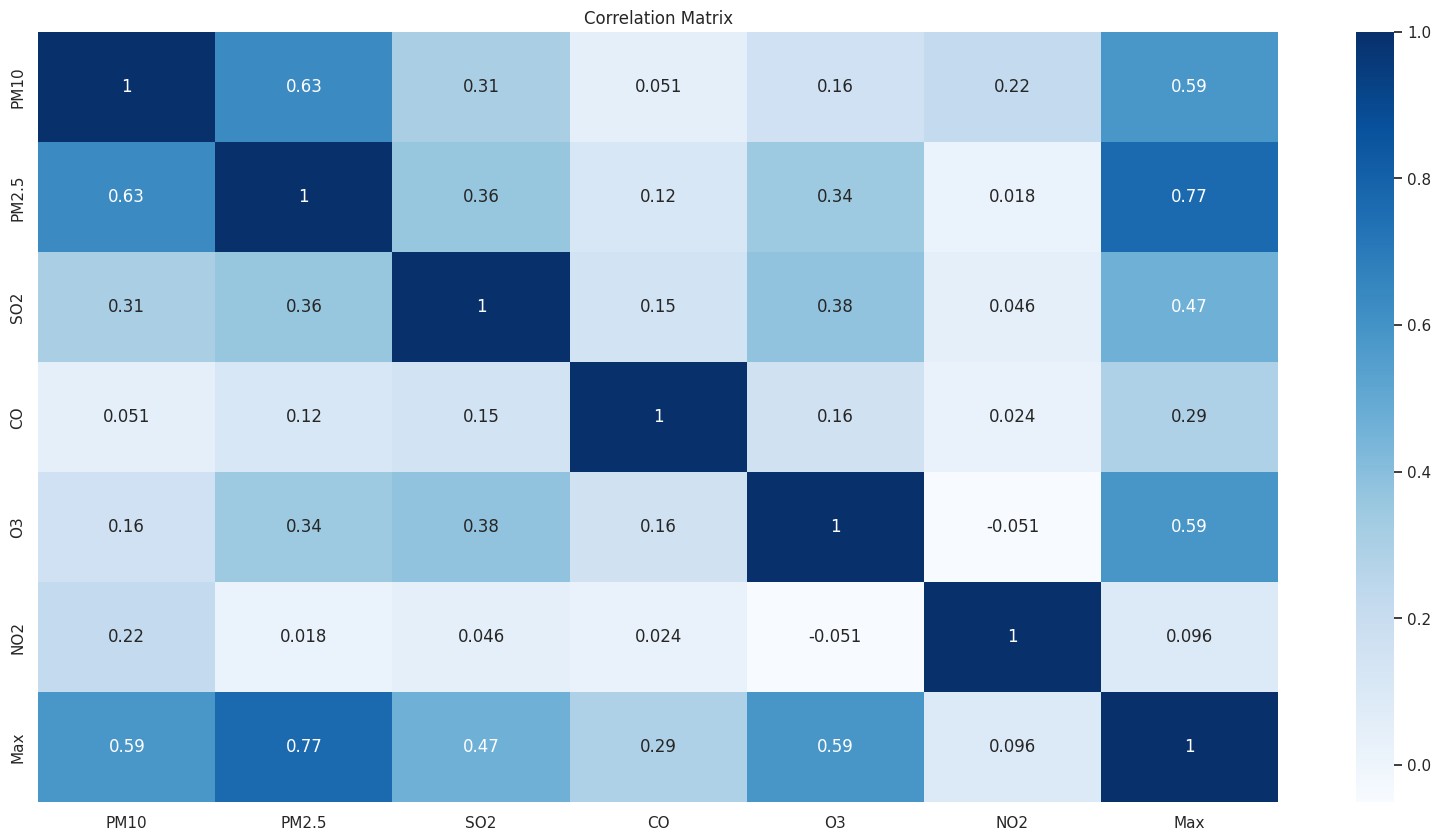

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot korelasi antar kolom numerik
sns.heatmap(numeric_df.corr(), cbar=True, annot=True, cmap='Blues')

plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_input = df.drop(['Category','Critical Component', 'Max', 'year', 'month', 'hour', 'day'], axis=1)

In [ ]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    8527 non-null   float64
 1   PM2.5   8527 non-null   float64
 2   SO2     6243 non-null   float64
 3   CO      8526 non-null   float64
 4   O3      5806 non-null   float64
 5   NO2     8526 non-null   float64
dtypes: float64(6)
memory usage: 479.1 KB


In [ ]:
df_input

,PM10,PM2.5,SO2,CO,O3,NO2
datetime,,,,,,
2021-01-01 00:00:00,13.0,40.0,0.0,25.0,0.0,0.0
2021-01-01 01:00:00,12.0,38.0,0.0,24.0,0.0,0.0
2021-01-01 02:00:00,11.0,35.0,0.0,23.0,0.0,0.0
2021-01-01 03:00:00,10.0,32.0,0.0,22.0,0.0,0.0
2021-01-01 04:00:00,9.0,29.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...
2021-12-31 19:00:00,15.0,0.0,10.0,21.0,1.0,11.0
2021-12-31 20:00:00,16.0,0.0,10.0,21.0,1.0,11.0
2021-12-31 21:00:00,17.0,0.0,10.0,21.0,1.0,11.0


<Axes: ylabel='datetime'>

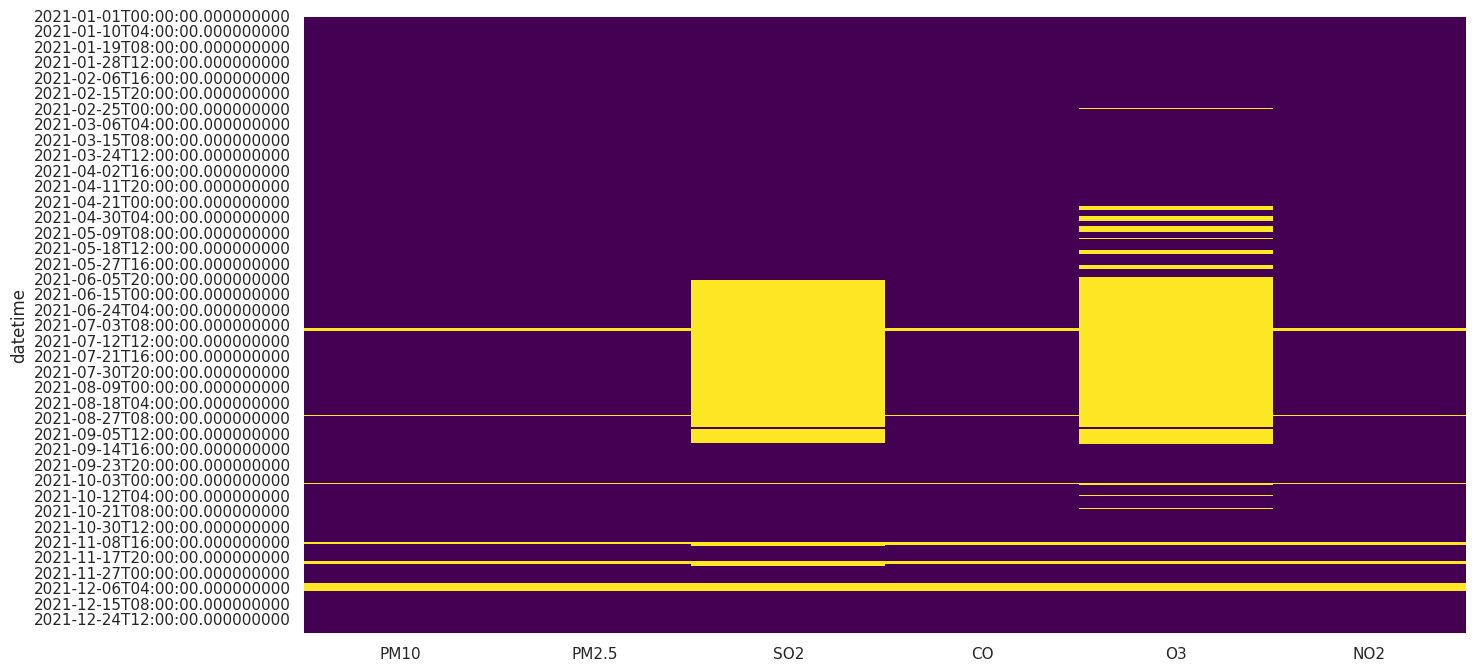

In [ ]:
# Plot null data
sns.heatmap(df_input.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Total null data
print(df_input.isnull().sum())
print('shape:', df_input.shape)

PM10      233
PM2.5     233
SO2      2517
CO        234
O3       2954
NO2       234
dtype: int64
shape: (8760, 6)


In [ ]:
# Drop null value
df_input.dropna(inplace=True)

In [ ]:
# Total null data
print(df_input.isnull().sum())
print('shape:', df_input.shape)

PM10     0
PM2.5    0
SO2      0
CO       0
O3       0
NO2      0
dtype: int64
shape: (5750, 6)


In [ ]:
df_input.describe()

,PM10,PM2.5,SO2,CO,O3,NO2
count,5750.000000,5750.000000,5750.000000,5750.000000,5750.000000,5750.000000
mean,17.413913,36.573217,14.207652,15.228348,20.306783,4.242609
std,7.463215,20.339939,10.630744,7.403078,17.800096,2.491682
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,12.000000,22.000000,3.000000,9.000000,3.000000,3.000000
50%,16.000000,35.000000,16.000000,14.000000,19.000000,4.000000
75%,21.000000,53.000000,21.000000,21.000000,34.000000,5.000000
max,51.000000,92.000000,63.000000,38.000000,77.000000,12.000000


In [ ]:
# Split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# split dataset to train and test
total_dataset = len(df_input)
df_train = df_input[:int(total_dataset*0.76)]
df_test = df_input[int(total_dataset*0.76):total_dataset]

# scaled
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.fit_transform(df_test)

print('Data for train:', df_train.shape)
print('Total day for train:', df_train.shape[0]/24)
print('\nData for test:', df_test.shape)
print('Total day for test:', df_test.shape[0]/24)

Data for train: (4370, 6)
Total day for train: 182.08333333333334

Data for test: (1380, 6)
Total day for test: 57.5


In [ ]:
# Choose a number of time steps
# n_steps_in history data for predict n_steps_out forecast data
n_steps_in, n_steps_out = 6, 3

# Convert into input/output
x_train, y_train = split_sequences(df_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_test_scaled, n_steps_in, n_steps_out)

# The dataset knows the number of features, e.g. 2
n_features = x_train.shape[2]

In [ ]:
# Look at the x_train structure
print('Data input structure for training')
print(x_train[0])

print('\nData output structure for validation')
print(y_train[0])

Data input structure for training
[[0.25581395 0.35       0.         0.61764706 0.         0.        ]
 [0.23255814 0.325      0.         0.58823529 0.         0.        ]
 [0.20930233 0.2875     0.         0.55882353 0.         0.        ]
 [0.18604651 0.25       0.         0.52941176 0.         0.        ]
 [0.1627907  0.2125     0.         0.5        0.         0.        ]
 [0.13953488 0.175      0.         0.47058824 0.         0.        ]]

Data output structure for validation
[[0.13953488 0.15       0.         0.47058824 0.         0.        ]
 [0.11627907 0.1375     0.         0.47058824 0.         0.        ]
 [0.11627907 0.1375     0.         0.5        0.         0.        ]]


In [ ]:
print('Total features:', n_features)
print('Total train data:', x_train.shape)
print('Total validation train data:', y_train.shape)
print('Total test data:', x_test.shape)
print('Total validation test data:', y_test.shape)

Total features: 6
Total train data: (4362, 6, 6)
Total validation train data: (4362, 3, 6)
Total test data: (1372, 6, 6)
Total validation test data: (1372, 3, 6)


In [ ]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 200)            │       165,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 3, 200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 3, 200)         │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 3, 6)           │         1,206 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 487,606 (1.86 MB)

 Trainable params: 487,606 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit model
epoch = 50

model.compile(optimizer='adam', loss='mse',
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0553 - mean_absolute_error: 0.1685 - val_loss: 0.0136 - val_mean_absolute_error: 0.0830
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0036 - mean_absolute_error: 0.0426 - val_loss: 0.0084 - val_mean_absolute_error: 0.0655
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0026 - mean_absolute_error: 0.0349 - val_loss: 0.0072 - val_mean_absolute_error: 0.0604
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0023 - mean_absolute_error: 0.0324 - val_loss: 0.0055 - val_mean_absolute_error: 0.0531
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0021 - mean_absolute_error: 0.0307 - val_loss: 0.0047 - val_mean_absolute_error: 0.0498
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0019 - mean_absolute_error: 0.0290 - val_loss: 0.0046 - val_mean_absolute_error: 0.0481
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0

In [ ]:
predictions = model.predict(x_test)
print(predictions.shape)
print(y_test.shape)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
(1372, 3, 6)
(1372, 3, 6)


In [ ]:
# reshape according to predictions shape
predictions = np.reshape(predictions, (1372*3, 6))
real = np.reshape(y_test, (1372*3, 6))

# rescale predictions
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real = pd.DataFrame(real)
real = scaler.inverse_transform(real)
real = pd.DataFrame(real)

print(predictions.shape)
print(real.shape)

(4116, 6)
(4116, 6)


In [ ]:
predictions

,0,1,2,3,4,5
0,12.930644,22.100391,0.523789,8.338552,-1.352153,4.102048
1,12.781174,21.744640,1.630063,8.415777,-0.881772,4.231306
2,12.731809,21.695005,2.253852,8.574576,-0.713328,4.314983
3,12.882011,22.135714,0.483530,8.345264,-1.247546,4.104273
4,12.736660,21.774380,1.602273,8.421194,-0.757519,4.233561
...,...,...,...,...,...,...
4111,15.353718,6.488242,10.804884,21.729811,5.336716,10.677588
4112,15.876120,8.126541,11.167833,21.846144,6.524115,10.630559
4113,15.120231,3.844892,10.800640,21.844126,3.661168,10.932300
4114,16.063860,6.864832,10.756270,21.688829,5.392637,10.707446


In [ ]:
real

,0,1,2,3,4,5
0,12.0,23.0,0.0,8.0,0.0,4.0
1,12.0,23.0,0.0,7.0,0.0,4.0
2,12.0,23.0,0.0,7.0,0.0,4.0
3,12.0,23.0,0.0,7.0,0.0,4.0
4,12.0,23.0,0.0,7.0,0.0,4.0
...,...,...,...,...,...,...
4111,17.0,0.0,10.0,21.0,1.0,11.0
4112,18.0,0.0,10.0,21.0,1.0,11.0
4113,17.0,0.0,10.0,21.0,1.0,11.0
4114,18.0,0.0,10.0,21.0,1.0,11.0


In [ ]:
df_final = pd.DataFrame()

In [ ]:
df_final['PM10'] = real[0]
df_final['PM2.5'] = real[1]
df_final['SO2'] = real[2]
df_final['CO'] = real[3]
df_final['O3'] = real[4]
df_final['NO2'] = real[5]

df_final['PM10_pred'] = predictions[0]
df_final['PM2.5_pred'] = predictions[1]
df_final['SO2_pred'] = predictions[2]
df_final['CO_pred'] = predictions[3]
df_final['O3_pred'] = predictions[4]
df_final['NO2_pred'] = predictions[5]

In [ ]:
df_final

,PM10,PM2.5,SO2,CO,O3,NO2,PM10_pred,PM2.5_pred,SO2_pred,CO_pred,O3_pred,NO2_pred
0,12.0,23.0,0.0,8.0,0.0,4.0,12.930644,22.100391,0.523789,8.338552,-1.352153,4.102048
1,12.0,23.0,0.0,7.0,0.0,4.0,12.781174,21.744640,1.630063,8.415777,-0.881772,4.231306
2,12.0,23.0,0.0,7.0,0.0,4.0,12.731809,21.695005,2.253852,8.574576,-0.713328,4.314983
3,12.0,23.0,0.0,7.0,0.0,4.0,12.882011,22.135714,0.483530,8.345264,-1.247546,4.104273
4,12.0,23.0,0.0,7.0,0.0,4.0,12.736660,21.774380,1.602273,8.421194,-0.757519,4.233561
...,...,...,...,...,...,...,...,...,...,...,...,...
4111,17.0,0.0,10.0,21.0,1.0,11.0,15.353718,6.488242,10.804884,21.729811,5.336716,10.677588
4112,18.0,0.0,10.0,21.0,1.0,11.0,15.876120,8.126541,11.167833,21.846144,6.524115,10.630559
4113,17.0,0.0,10.0,21.0,1.0,11.0,15.120231,3.844892,10.800640,21.844126,3.661168,10.932300
4114,18.0,0.0,10.0,21.0,1.0,11.0,16.063860,6.864832,10.756270,21.688829,5.392637,10.707446


<Axes: >

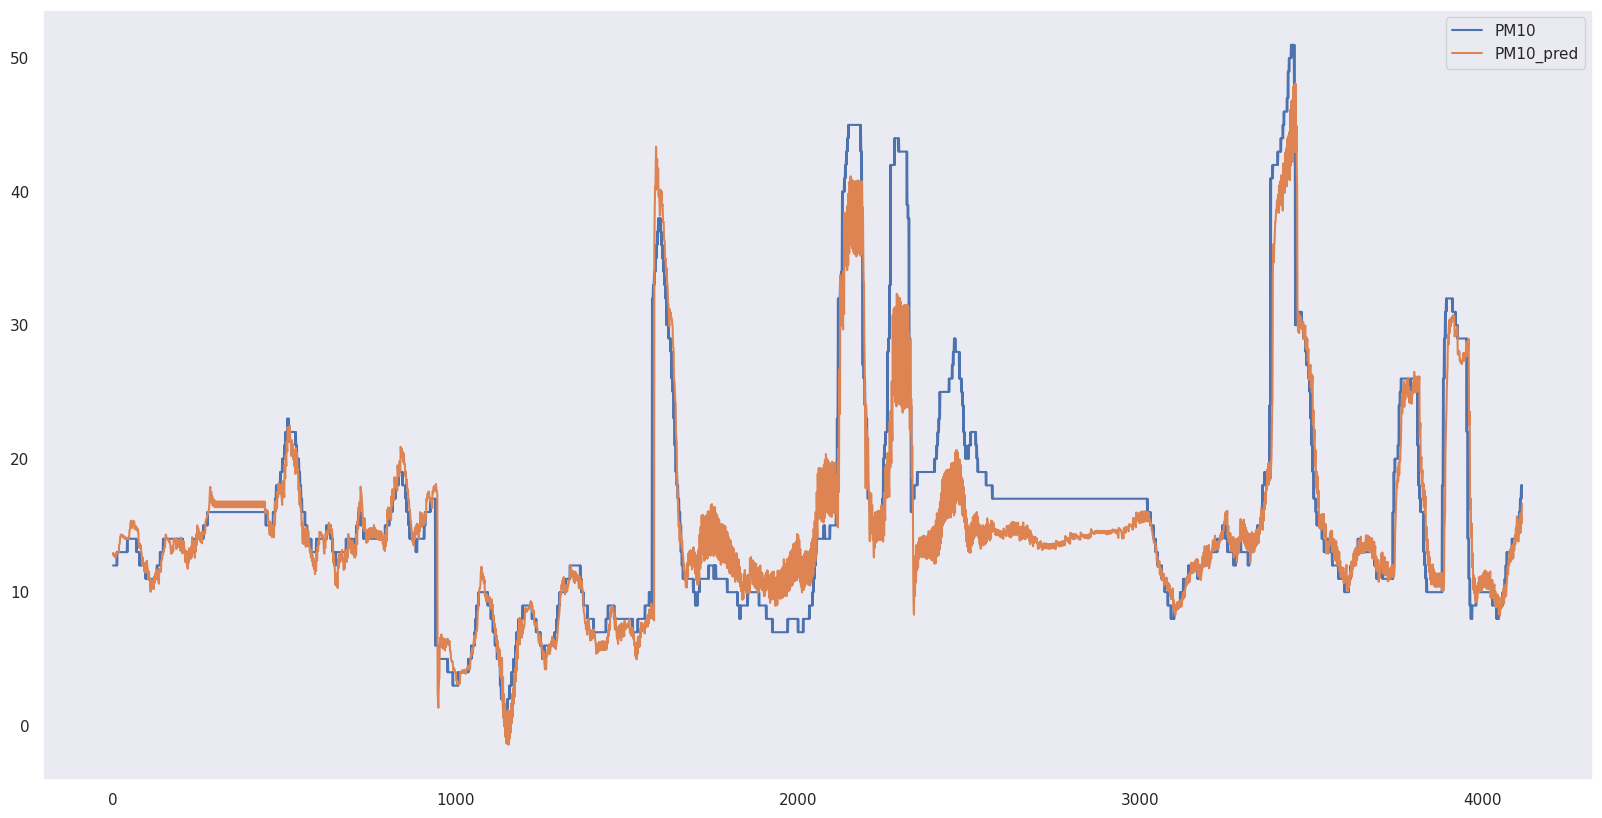

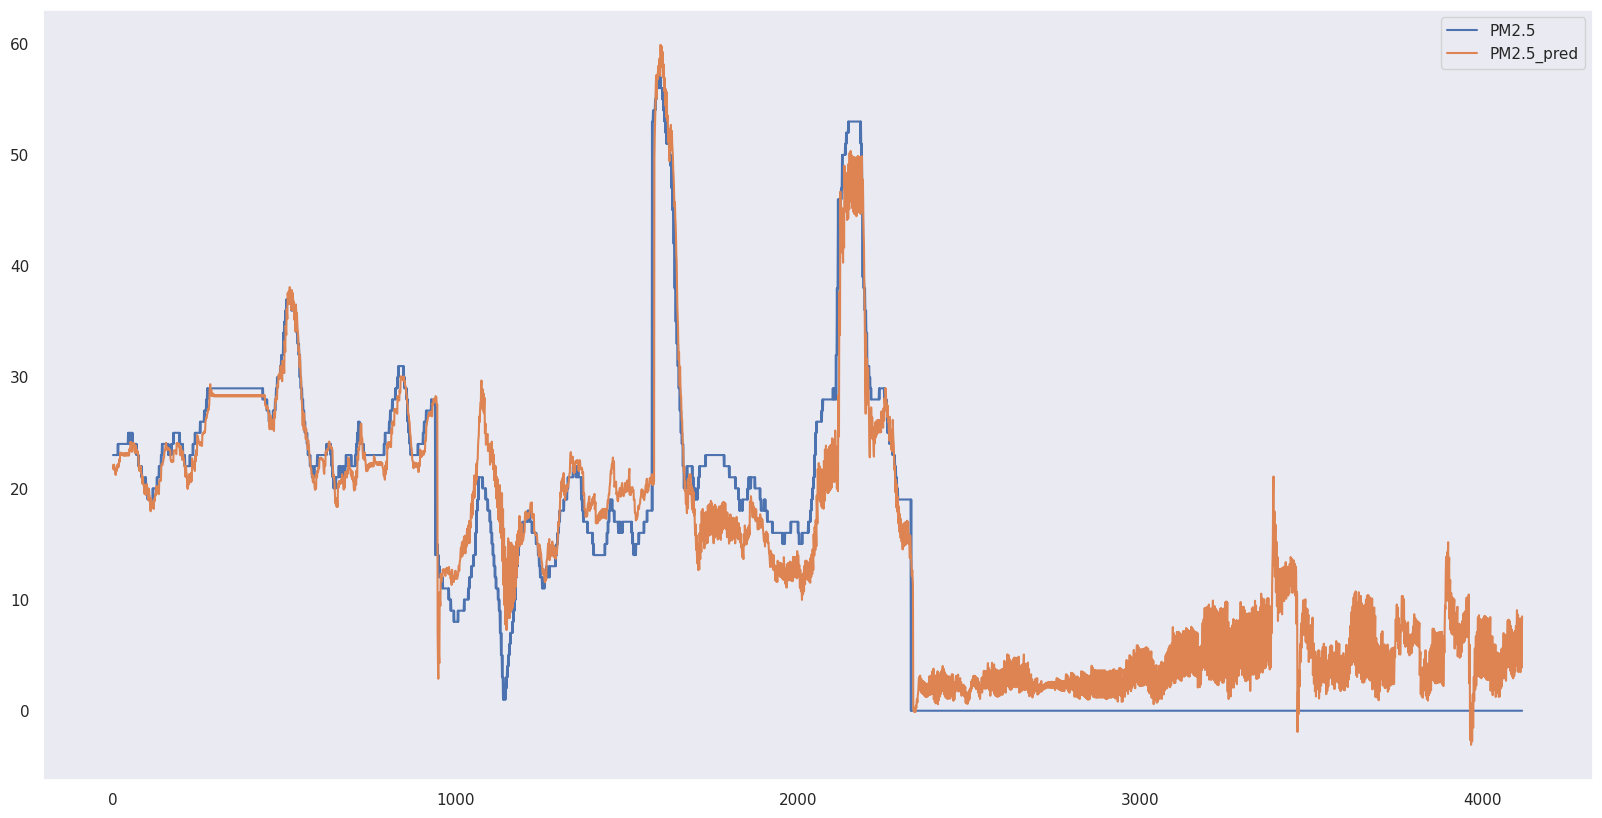

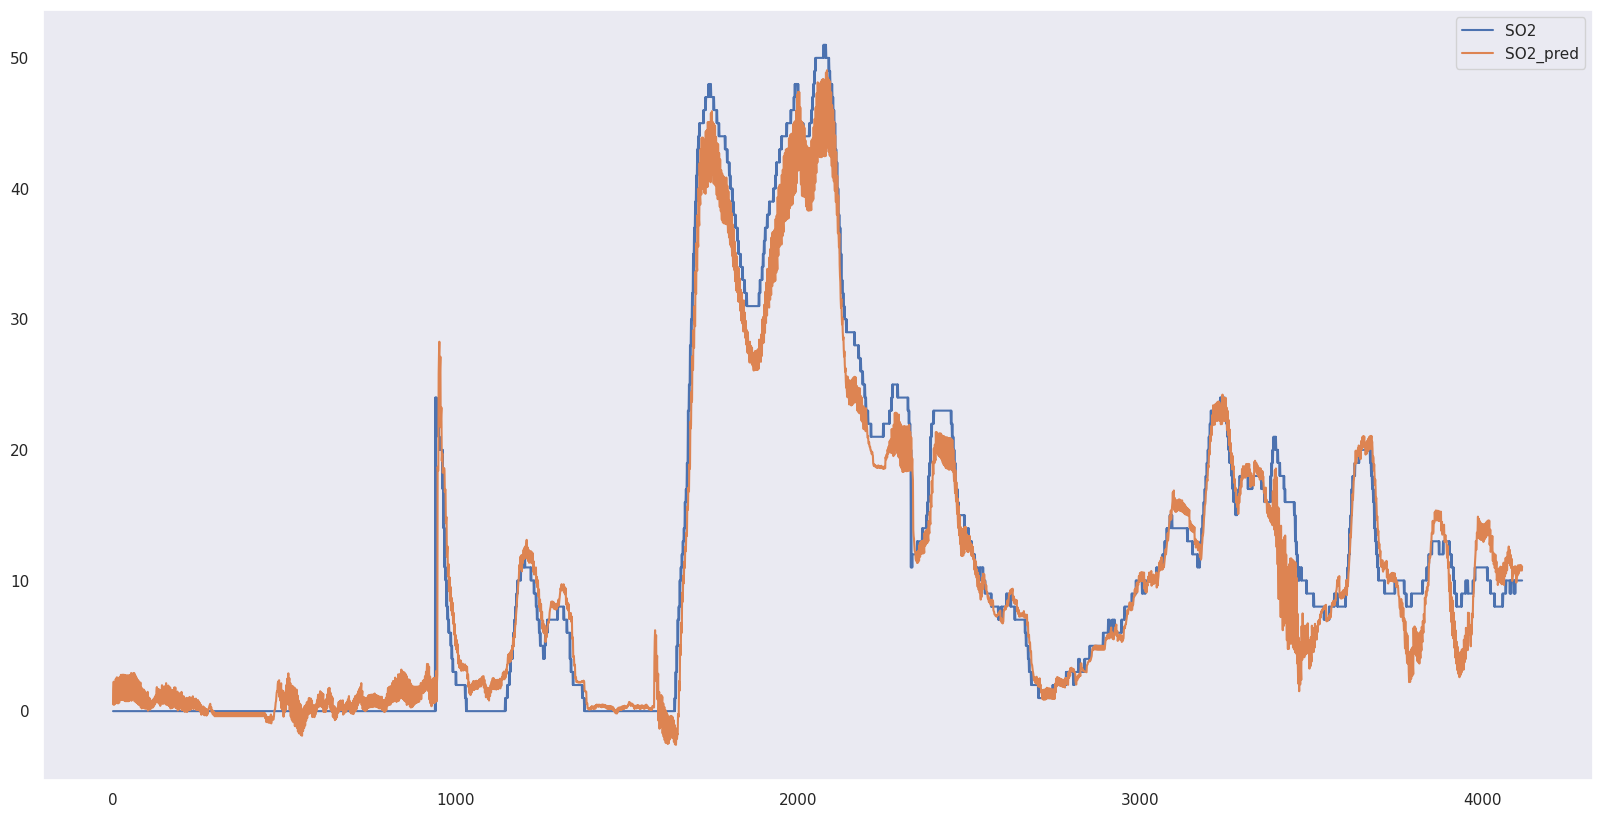

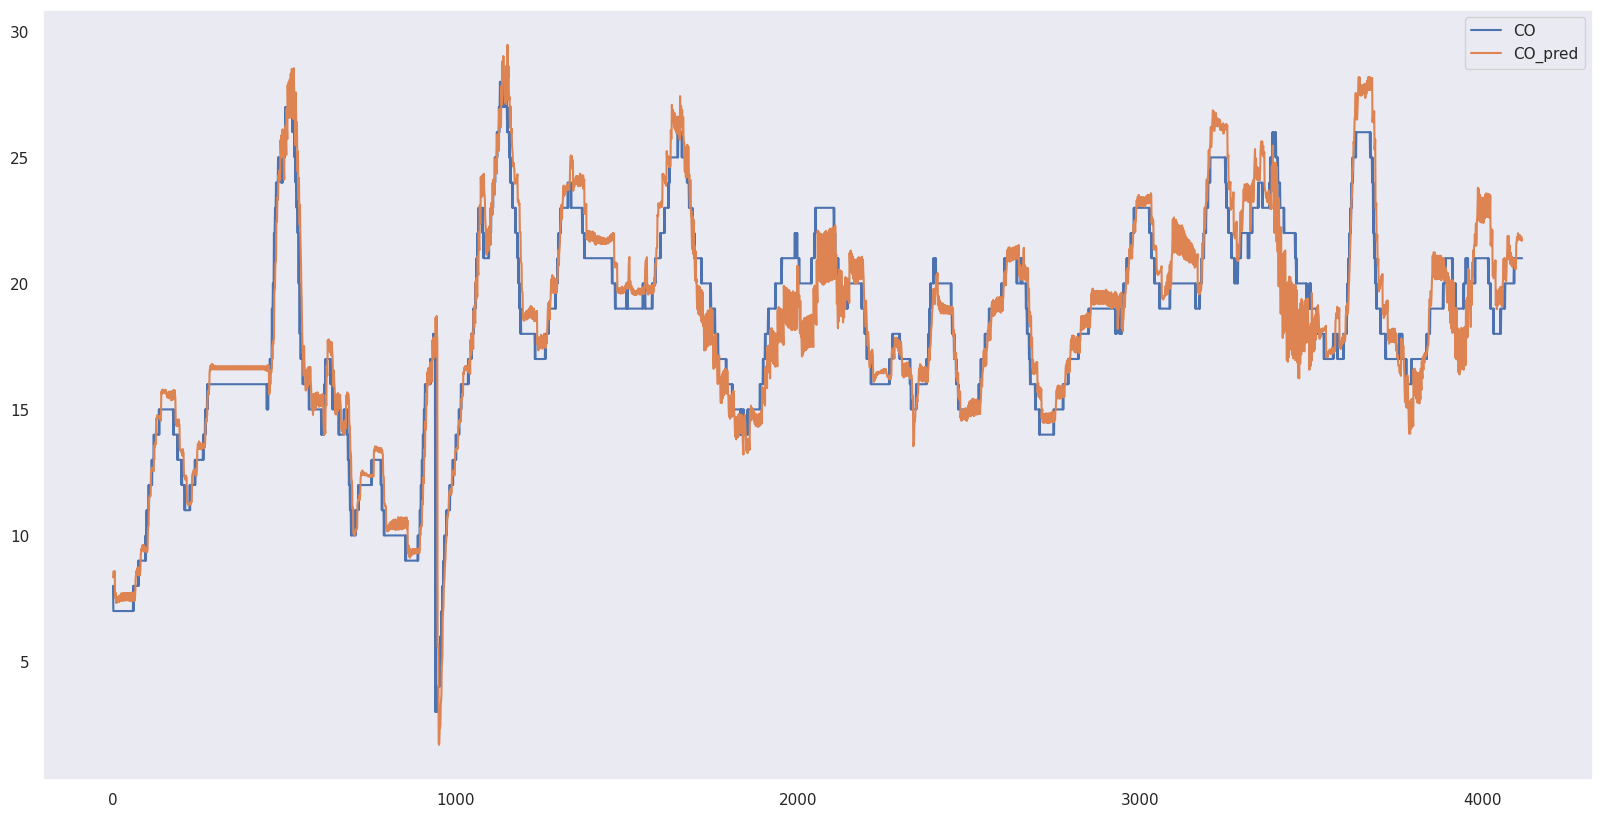

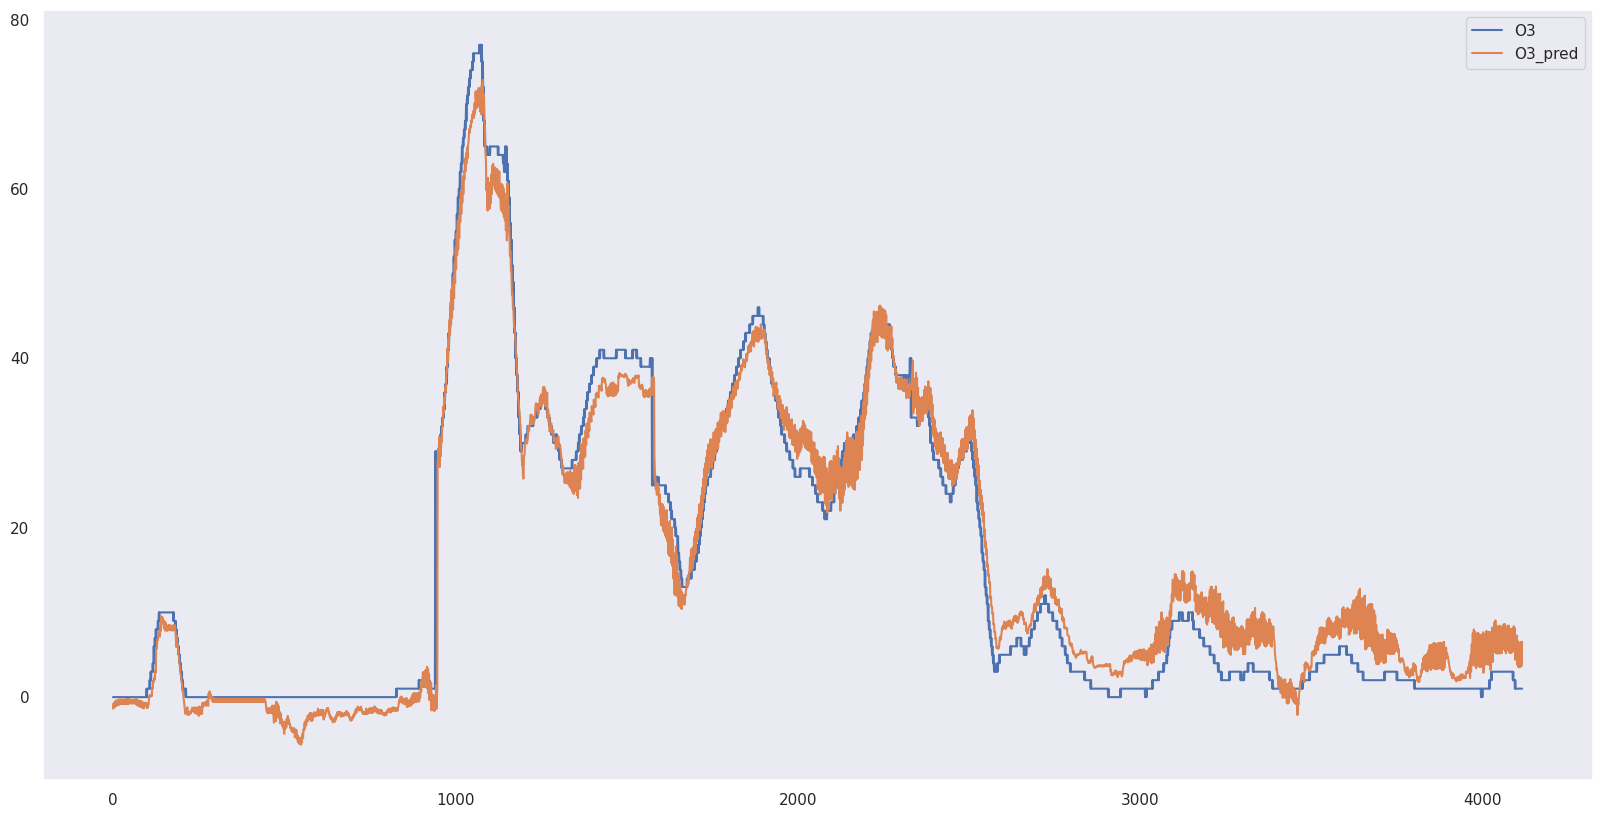

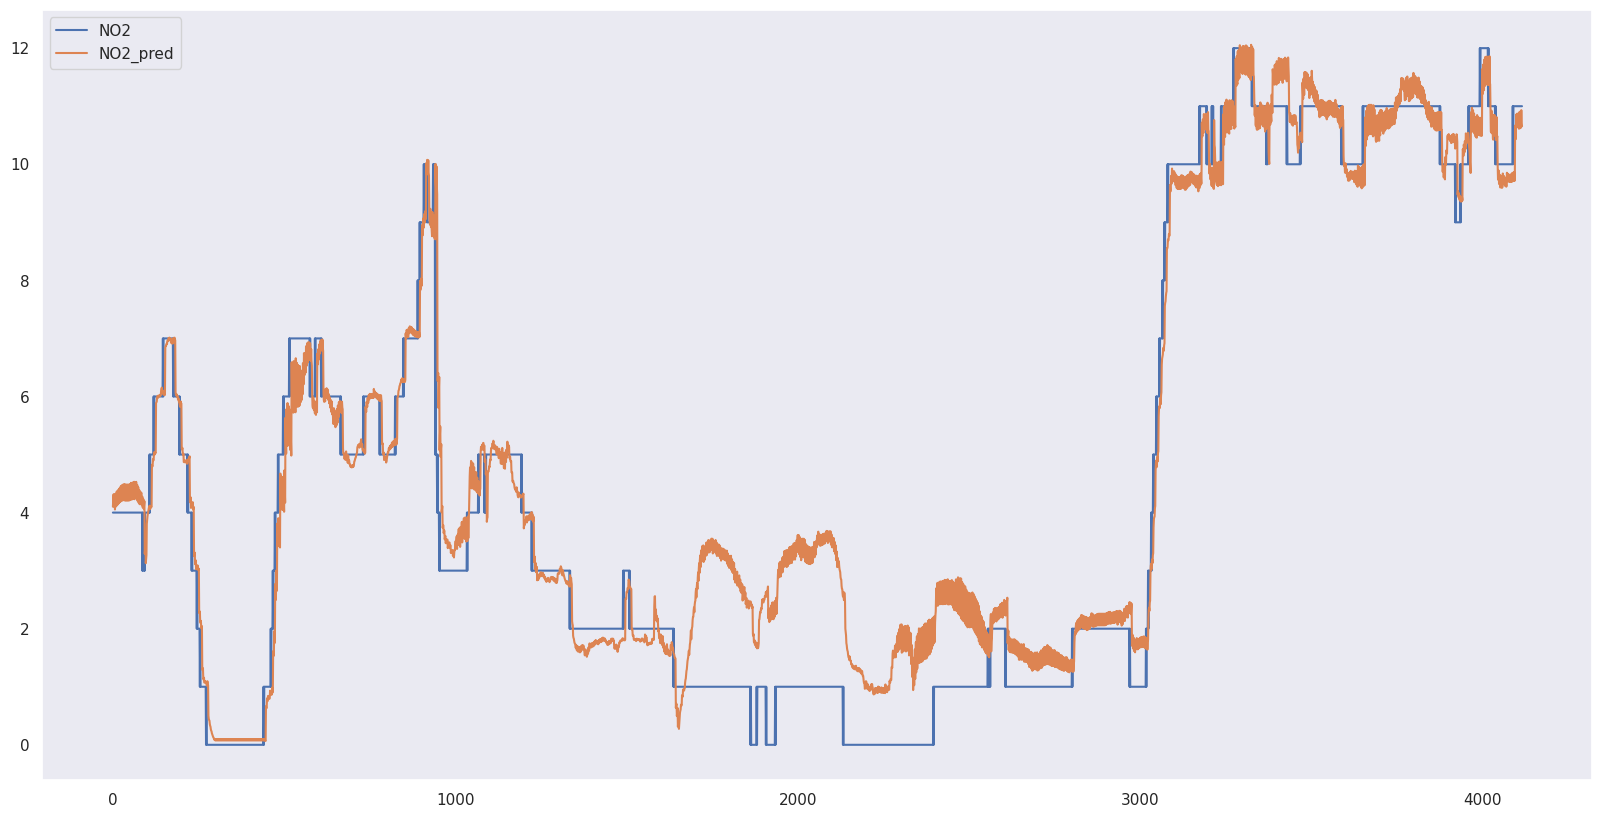

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
df_final[['PM10', 'PM10_pred']].plot()
df_final[['PM2.5', 'PM2.5_pred']].plot()
df_final[['SO2', 'SO2_pred']].plot()
df_final[['CO', 'CO_pred']].plot()
df_final[['O3', 'O3_pred']].plot()
df_final[['NO2', 'NO2_pred']].plot()

In [ ]:
print(df_final.columns)

Index(['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'PM10_pred', 'PM2.5_pred',
       'SO2_pred', 'CO_pred', 'O3_pred', 'NO2_pred'],
      dtype='object')


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

indicator = ['PM10', 'PM2.5', 'SO2', 'O3', 'NO2']
for i in indicator:
    mse = mean_squared_error(df_final[f'{i}'], df_final[f'{i}_pred'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(df_final[f'{i}'], df_final[f'{i}_pred'])

    print(f'{i} - RMSE: {rmse}, MSE: {mse}, MAE: {mae}')

PM10 - RMSE: 3.714816146416762, MSE: 13.799859001678682, MAE: 2.211421398903932
PM2.5 - RMSE: 4.78854643007536, MSE: 22.930176912987477, MAE: 3.587128101141202
SO2 - RMSE: 2.8040665107662957, MSE: 7.8627889968010685, MAE: 1.883489703135954
O3 - RMSE: 3.412002089899136, MSE: 11.64175826147607, MAE: 2.7114381157341474
NO2 - RMSE: 0.9876412435593767, MSE: 0.9754352259795119, MAE: 0.6833938988807192


In [ ]:
# Simpan model
model.save('air_quality_lstm_model.h5')
print("Model berhasil disimpan dalam format H5.")

Model berhasil disimpan dalam format H5.


In [ ]:
df_final.to_csv('hasil_prediksi_air_quality.csv', index=False)

In [ ]:
import joblib

# Simpan scaler yang digunakan untuk train
joblib.dump(scaler, "scaler_air_quality.pkl")

['scaler_air_quality.pkl']

In [ ]:
# Simpan MinMaxScaler hanya untuk kolom PM2.5
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Ambil hanya kolom PM2.5 untuk training
pm25_train = df_train[['PM2.5']]

# Fit scaler
scaler_pm25 = MinMaxScaler()
scaler_pm25.fit(pm25_train)

# Simpan parameter min_ dan scale_ ke file numpy
np.save("scaler_pm25.npy", [scaler_pm25.min_, scaler_pm25.scale_])

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.8.0


In [ ]:
!python --version

Python 3.11.13


In [ ]:
!pip install pipreqs

In [ ]:
!pip freeze > requirements.txt


In [ ]:
pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.2.0.38